In [7]:
from glob import glob
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Load reference data 

First, I loaded the paths to 195 angstrom data from SUVI. This data had been downloaded with the [GOES Solar Retriever](https://github.com/jmbhughes/goes_solar_retriever) for the entire time period of the 195 Composite Images at a 4 hour cadence. We sum them up to create a base image. 

In [2]:
path = "/home/marcus/Desktop/suvi_movie/data/"
fns = sorted(glob(path + "*.fits"))

In [3]:
total = np.zeros((1280,1280))
count = 0
failures = []
for fn in fns:
    try:
        with fits.open(fn) as hdus:
            data = hdus[1].data
            total += data
            count += 1
    except:
        failures.append(fn)
base = total/count

Below, you can see the solar disk in the averaged image, no noise or structures should make it through so many images averaged.

<IPython.core.display.Javascript object>


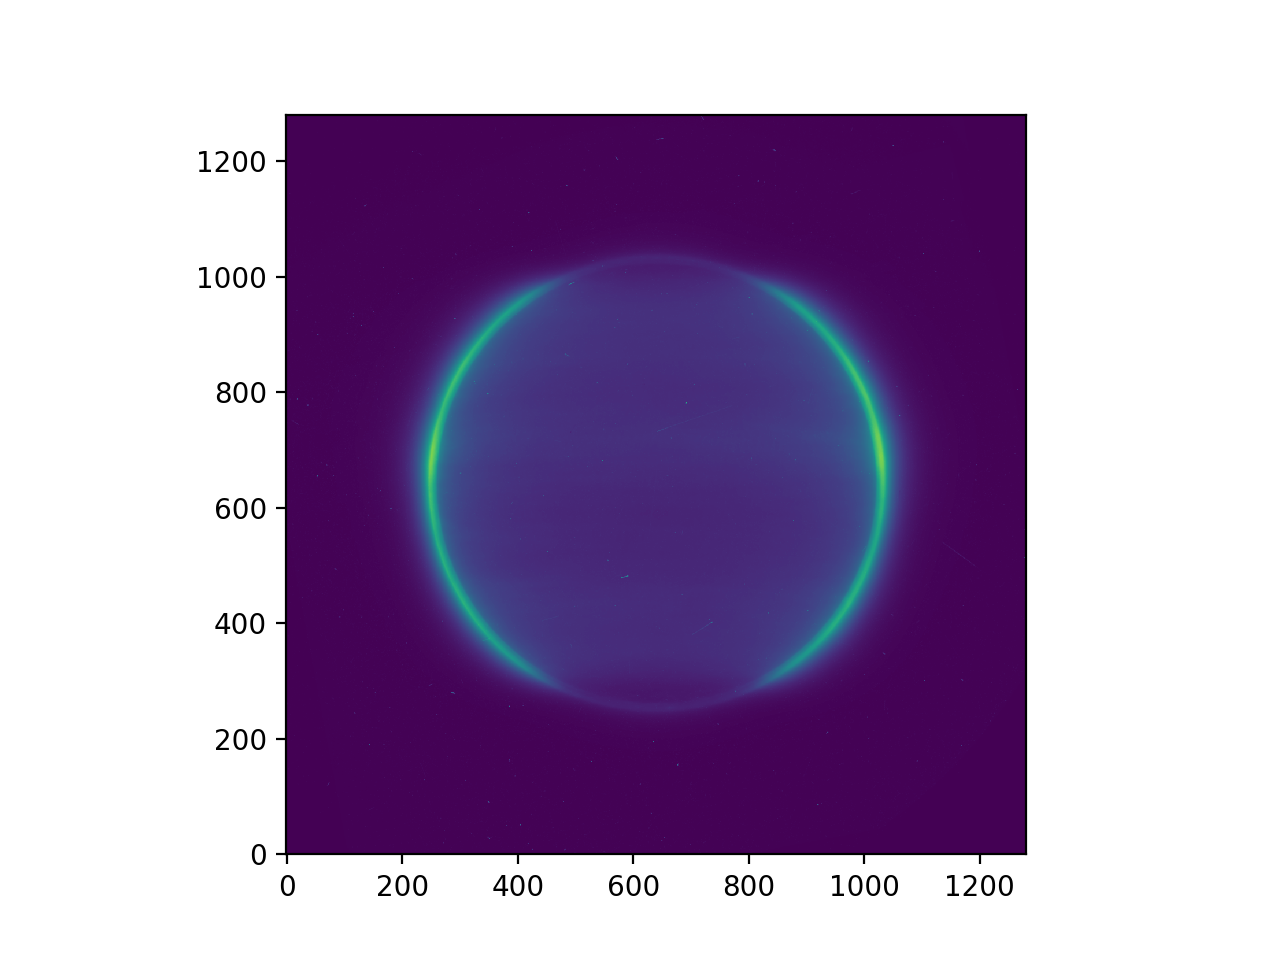

In [8]:
fig, ax = plt.subplots()
ax.imshow(base, origin='lower')
fig.show()

In [5]:
fits.writeto("stationary_reference.fits", base)

# Adding noise for large test frames 

Below is an example of how we will add noise for test frames. 

<IPython.core.display.Javascript object>


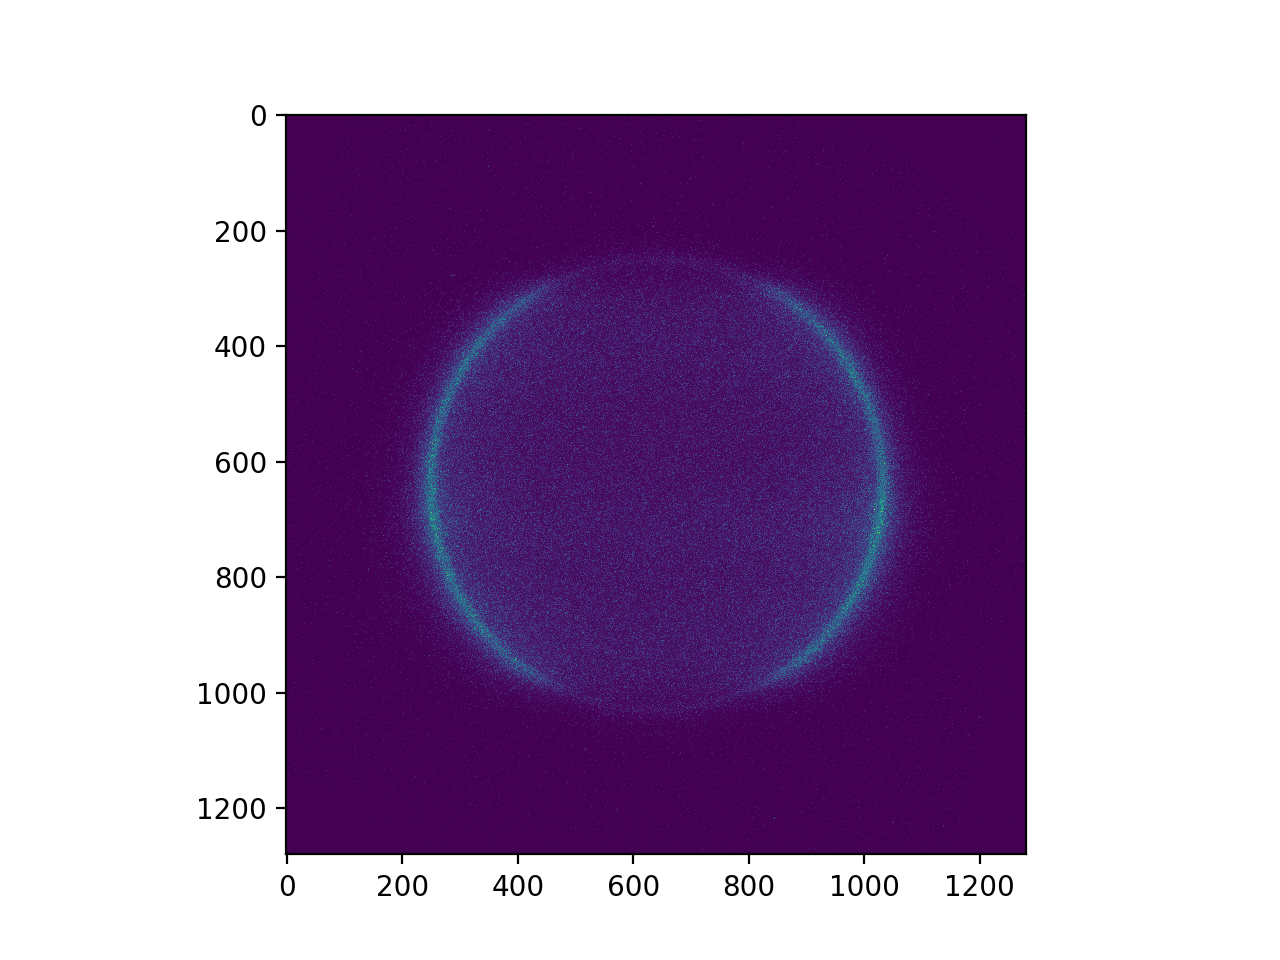

In [6]:
fig, ax = plt.subplots()
ax.imshow(np.random.poisson(np.abs(base)) + base)
fig.show()

Specifying the number of test frames to create, we make them and then write them out to the appropriate data folder. 

In [7]:
num_images = 200
for i in range(num_images):
    img = np.random.poisson(np.abs(base)) + base
    fits.writeto("./stationary_large/{:03d}.fits".format(i), img)

# Adding noise for small test frames 

For speed, we take a smaller chunk of the image and run it instead. 

<IPython.core.display.Javascript object>


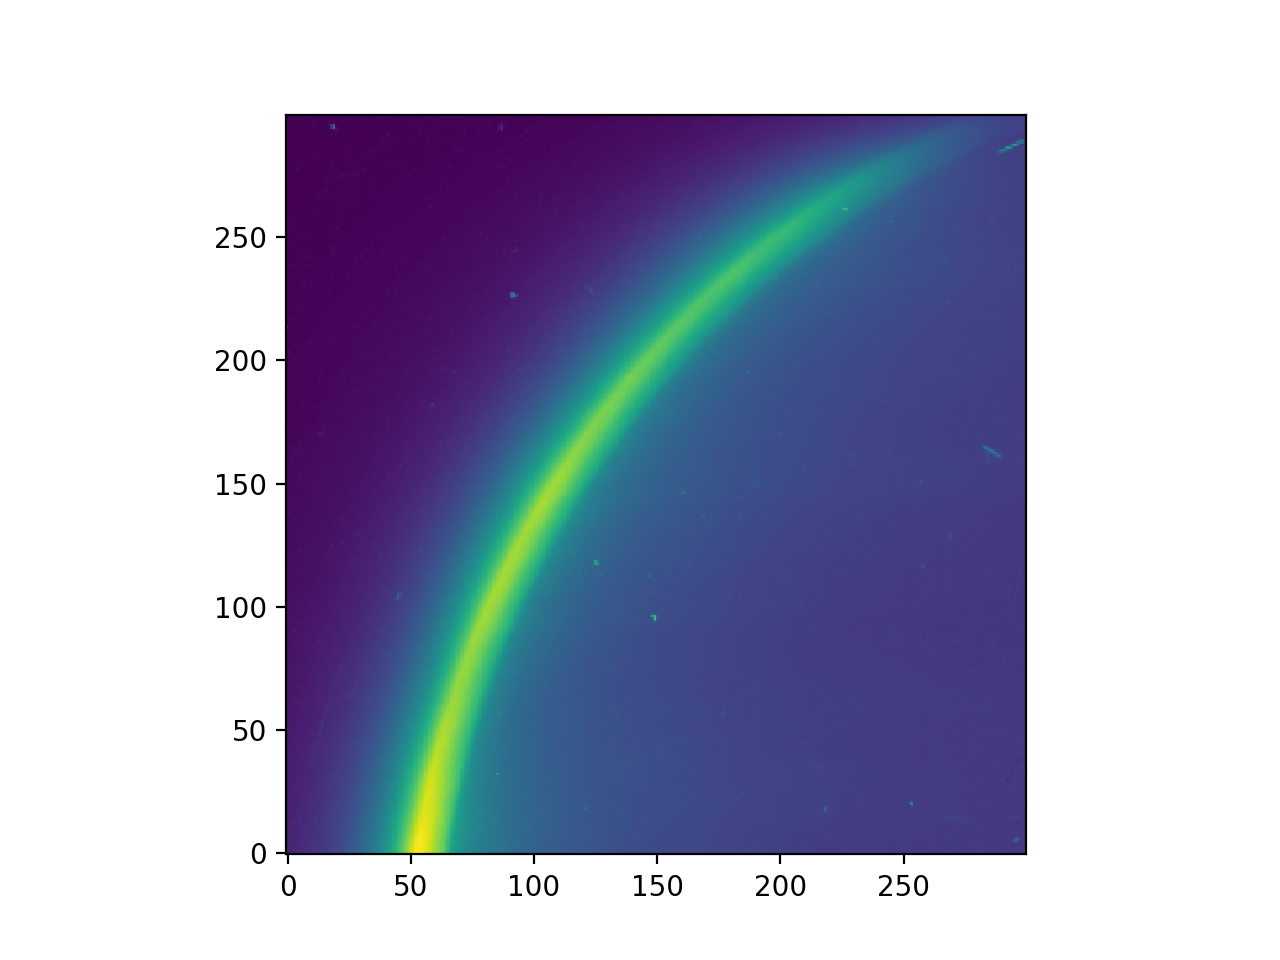

In [10]:
fig, ax = plt.subplots()
ax.imshow(base[700:1000, 200:500], origin='lower')
fig.show()

In [11]:
base = base[700:1000, 200:500]

In [12]:
num_images = 200
for i in range(num_images):
    img = np.random.poisson(np.abs(base)) + base
    fits.writeto("./stationary_small/{:03d}.fits".format(i), img)

In [13]:
fits.writeto("/home/marcus/Desktop/noise_gating/tests/data/stationary_small_ref.fits", base)